## Aula de ML Notebook

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('spotify-tracks-dataset.csv').iloc[:,3:]
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [24]:
X = df.drop('danceability', axis=1)
Y = df['danceability']

**train** (`X_train` and `y_train`), **validation** (`X_val` and `y_val`) and **test** (`X_test` and `y_test`). Our dataset size will then be **70% for train**, **15% for validation** and **15% for test**.

In [25]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X,Y, test_size=0.15, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1765, random_state=42)

In [ ]:
X_train_final = X_train.drop(['artists', 'album_name', 'track_name', 'mode', 'track_genre'], axis=1)
X_test_final = X_test.drop(['artists', 'album_name', 'track_name', 'mode', 'track_genre'], axis=1)

In [30]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79797 entries, 84311 to 47348
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        79797 non-null  int64  
 1   duration_ms       79797 non-null  int64  
 2   explicit          79797 non-null  bool   
 3   energy            79797 non-null  float64
 4   key               79797 non-null  int64  
 5   loudness          79797 non-null  float64
 6   speechiness       79797 non-null  float64
 7   acousticness      79797 non-null  float64
 8   instrumentalness  79797 non-null  float64
 9   liveness          79797 non-null  float64
 10  valence           79797 non-null  float64
 11  tempo             79797 non-null  float64
 12  time_signature    79797 non-null  int64  
 13  track_genre       79797 non-null  int64  
dtypes: bool(1), float64(8), int64(5)
memory usage: 10.6 MB


In [74]:
model = LinearRegression()

In [75]:
model.fit(X_train_final, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
model.score(X_test_final, Y_test)

0.35957840692946375

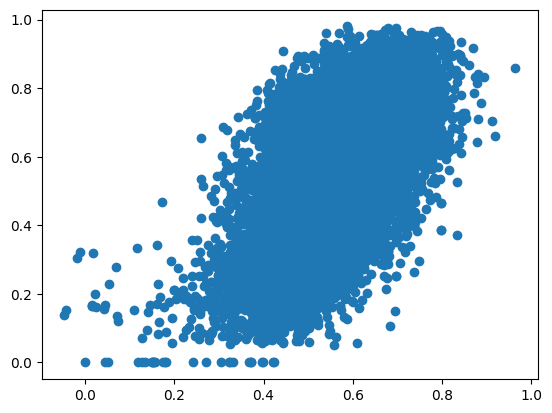

In [77]:
plt.scatter(model.predict(X_test_final), Y_test)
